In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.insert(0, "../../")

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import sys
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
input_metric_files_rows = [
    ['precision_mAP.csv', 'recall_AR@100.csv'],
    ['precision_mAP_medium.csv', 'recall_AR@100_medium.csv'],
    ['precision_mAP_large.csv', 'recall_AR@100_large.csv'],
    ['precision_mAP_small.csv', 'recall_AR@100_small.csv']
]

In [44]:
def load(path): return pd.read_csv(path, usecols=[1, 2])

def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "MAX F1 Score: {:.3f} on step: {:.0f}".format(ymax, xmax)
    if not ax:
        ax=plt.gca()

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1.5)

    arrowprops=dict(arrowstyle="->", color='black', connectionstyle="angle,angleA=0,angleB=60")
    
    kw = dict(
        xycoords='data',
        textcoords="axes fraction",
        arrowprops=arrowprops, 
        bbox=bbox_props, 
        ha="right", 
        va="top"
    )
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.96,1.03), **kw)

def plot_metrics(metrics, size=(20,10)):
    sns.set(rc={'figure.figsize':size})
    sns.set_style("darkgrid")
    sns.lineplot(
        x='Step', 
        y='value', 
        hue='variable', 
        markers=True,
        data=pd.melt(metrics, ['Step'])
    )
    plt.xlabel("Steps")
    plt.ylabel("Metrics")    
 
    annot_max(x=metrics['Step'],y=metrics['F1 Score'])
    plt.show()

    pd.set_option('display.max_rows', 500)
    pd.set_option('display.max_columns', 500)
    pd.set_option('display.width', 1000)
    return metrics

def head(filename):
    name = filename.split('.')[0]
    name =' '.join(name.split('_'))
    return name[0].capitalize() + name[1:]

def compute_f1_score(precision_messures, recall_measures, precision_name, recall_name):
    precision = precision_messures['Value']
    recall = recall_measures['Value']
    f1_score = 2 * (precision * recall) / (precision + recall)

    return pd.DataFrame({
        'Step': precision_messures['Step'],
        head(precision_name): precision,
        head(recall_name): recall,
        'F1 Score': f1_score
    })

def plot_f1_score_metrics(input_metric_files_rows):
    for precision_file, recall_file in input_metric_files_rows:
        metric_table = compute_f1_score(
            load(precision_file),
            load(recall_file), 
            precision_name=precision_file, 
            recall_name=recall_file
        )
        plot_metrics(metric_table, size=(25,9))

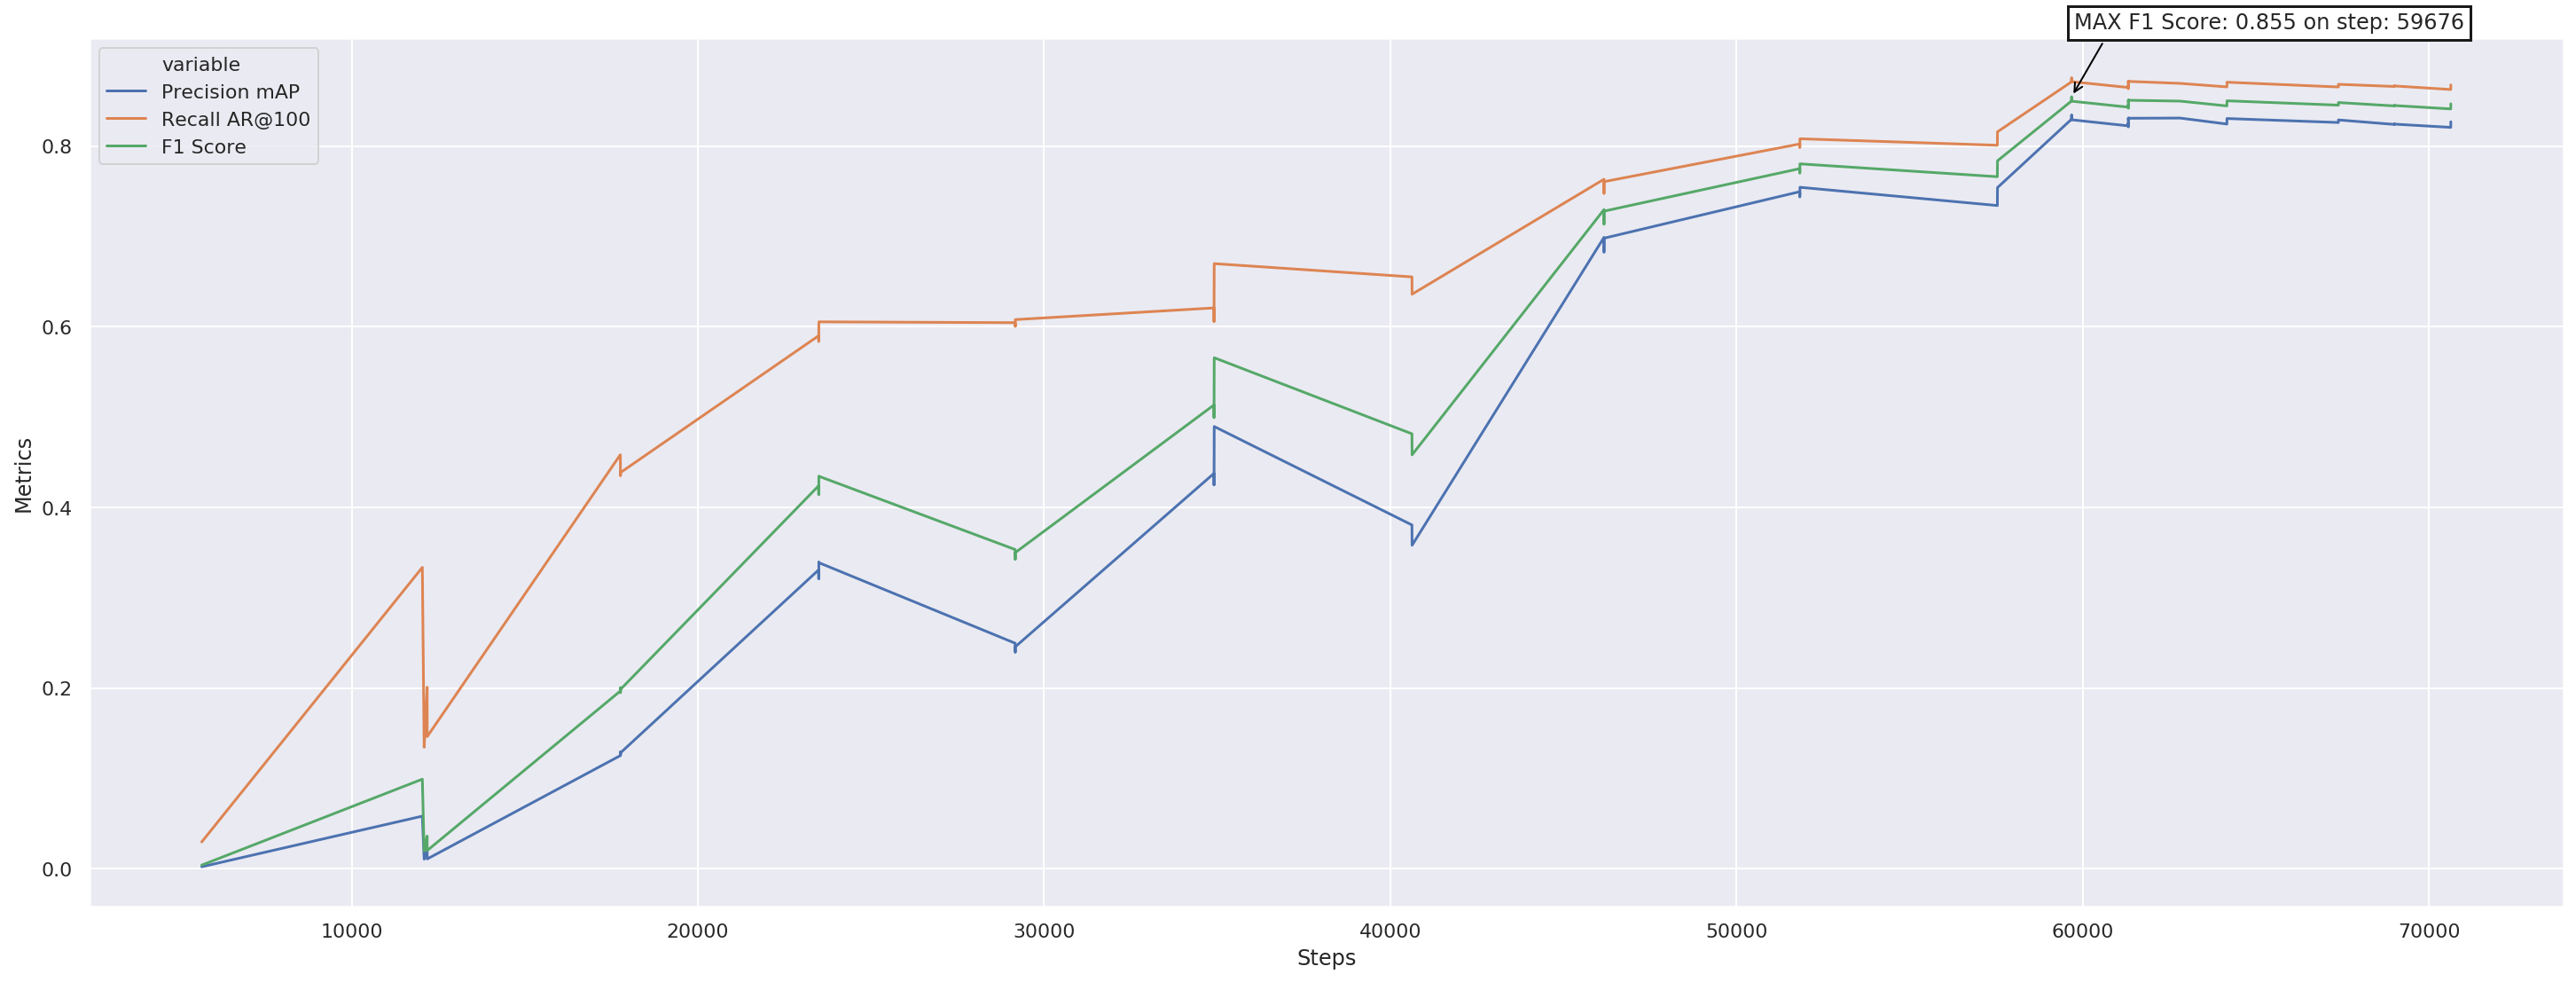

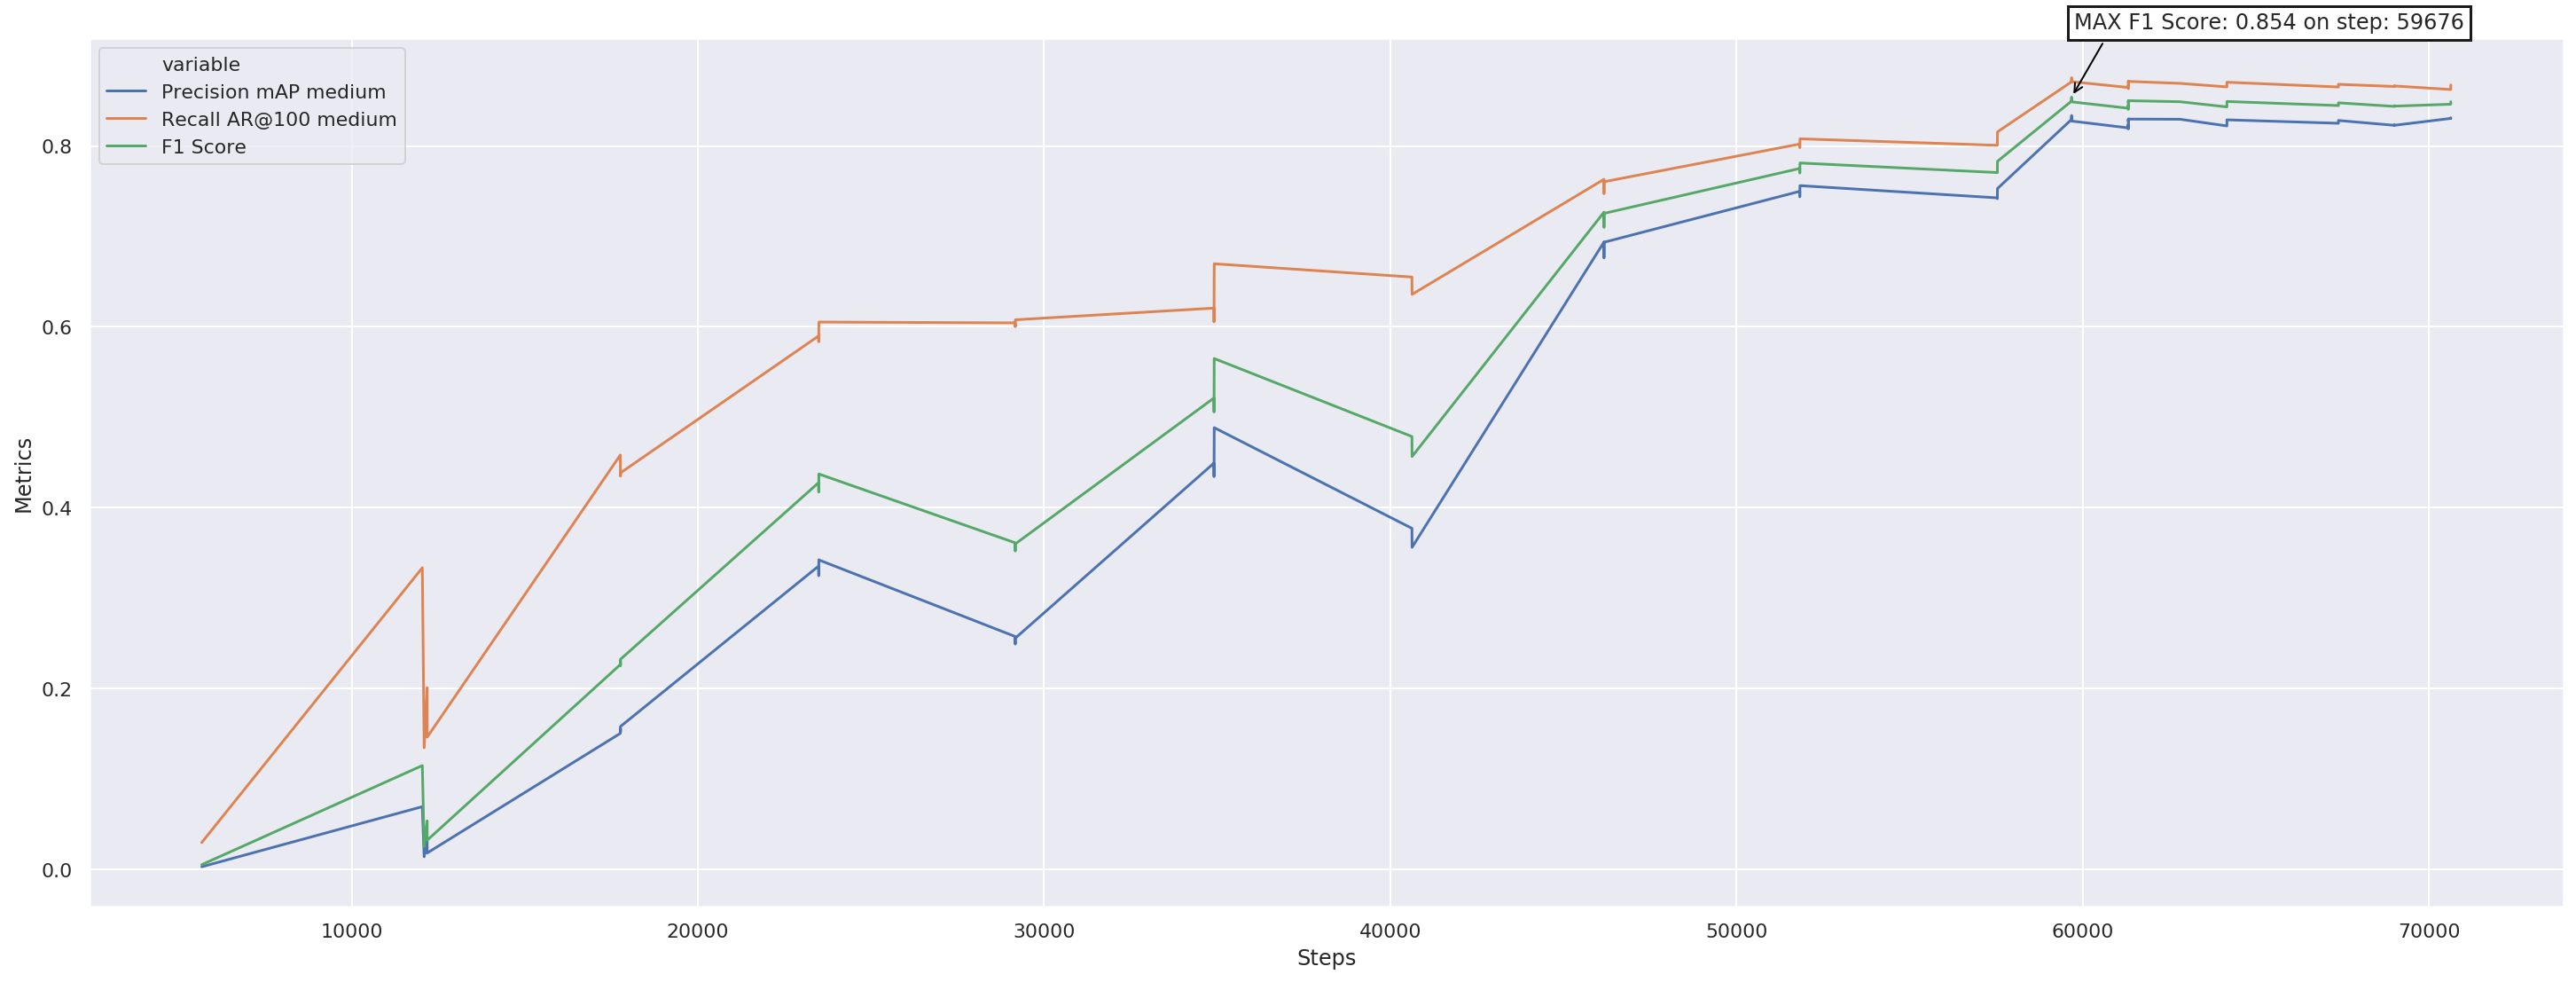

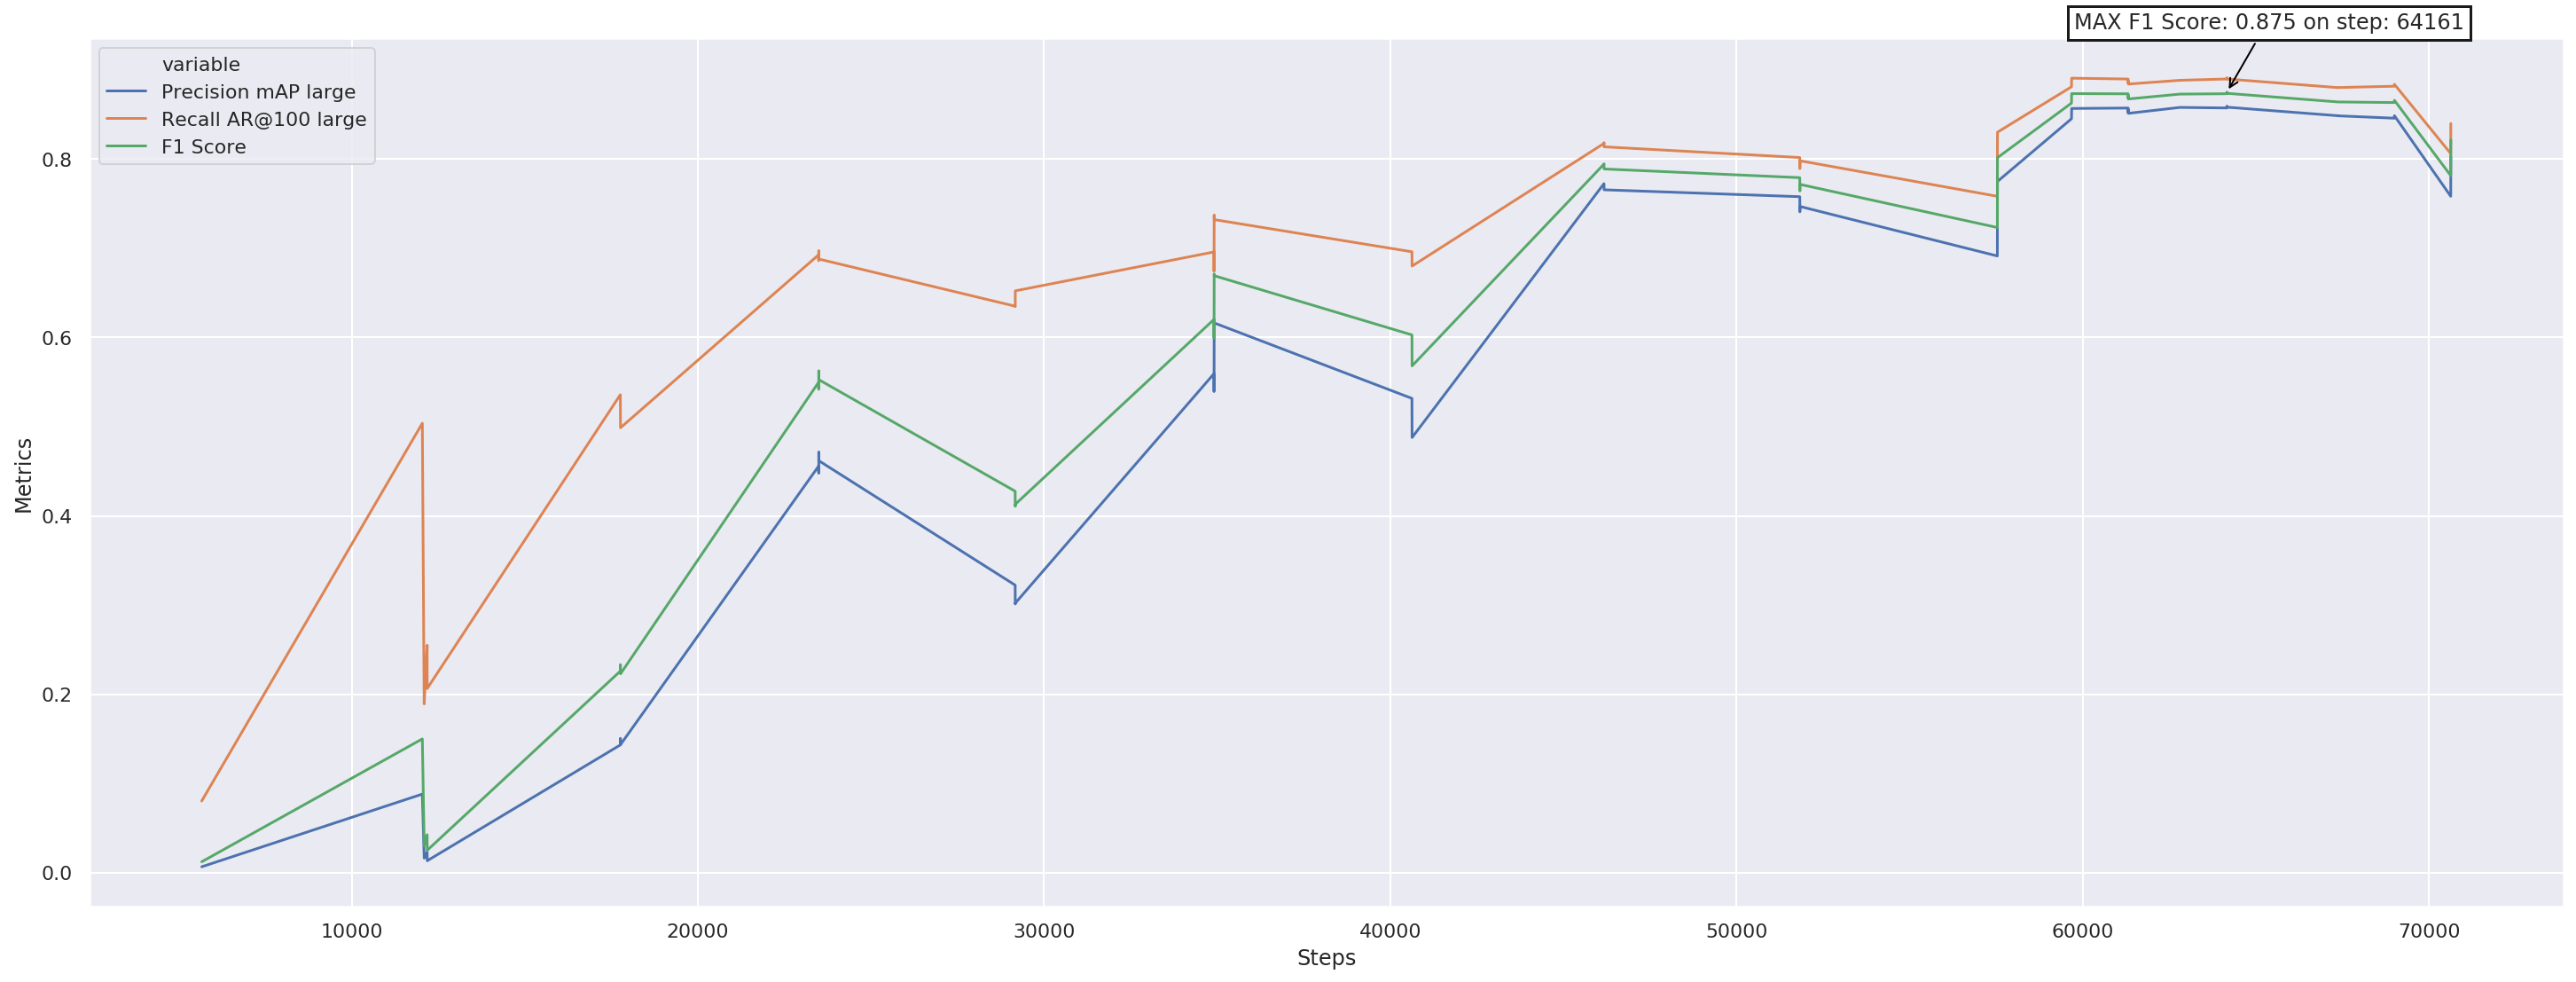

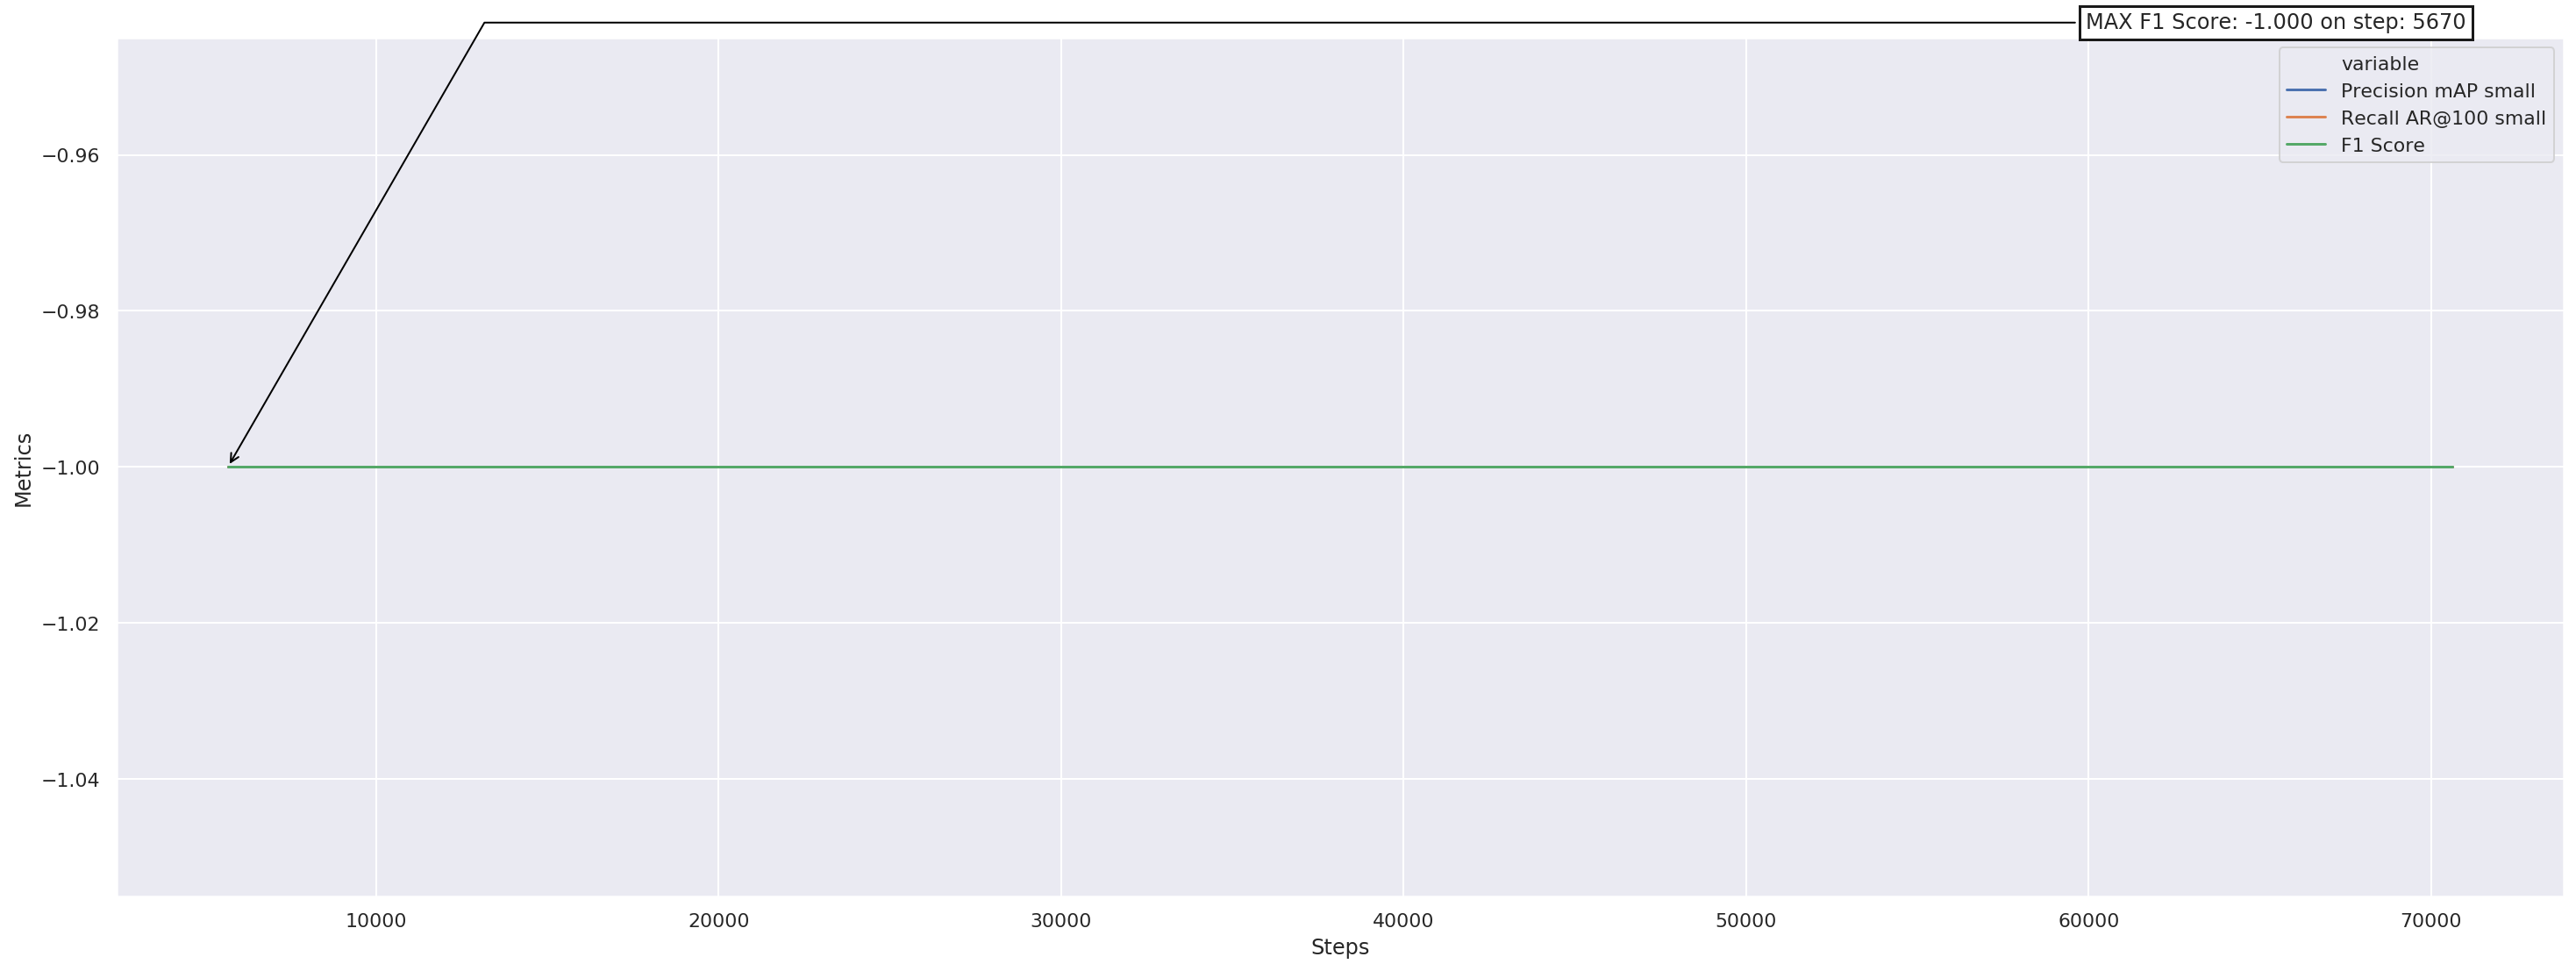

In [45]:
plot_f1_score_metrics(input_metric_files_rows)